This will explore the previously parsed Zooniverse annotated data.

In [64]:
data_file = './zooniverse/cleaned_zooniverse.csv' # cleaned zooniverse data

dir_api = './example_hists/LLM_outputs/chatgpt_api/'

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from glob import glob

In [66]:
df = pd.read_csv(data_file)

In [67]:
df.head()

,annotators,image file,Human nGaussians,Human median (number),Human median (draw),Ground Truth nGaussians,Ground Truth Median
0,annotator1,id_0041.jpeg,1,0.055,0.055269,1,0.054428
1,annotator1,id_0014.jpeg,3,0.450,0.457472,1,0.478811
2,annotator1,id_0028.jpeg,2,-0.420,-0.415863,2,-0.417302
3,annotator1,id_0057.jpeg,2,-0.700,-0.707283,2,-0.758364
4,annotator1,id_0020.jpeg,1,-0.200,-0.171428,1,-0.178007


### Annotator 1

In [68]:
df_a1 = df[df['annotators']=='annotator1']

len(df_a1)

80

<Axes: xlabel='Ground Truth nGaussians', ylabel='Human nGaussians'>

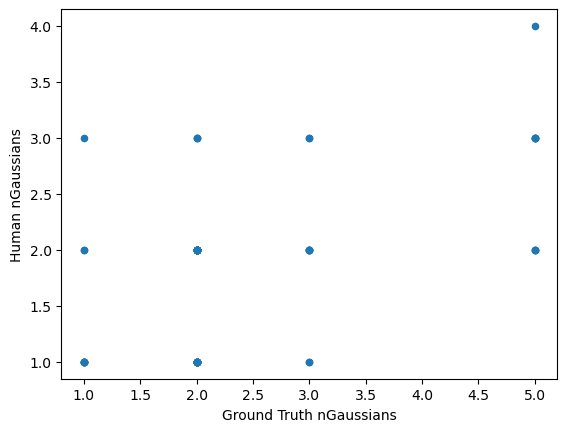

In [69]:
df_a1.plot(x='Ground Truth nGaussians', y='Human nGaussians', kind='scatter')

(-0.8, 0.9)

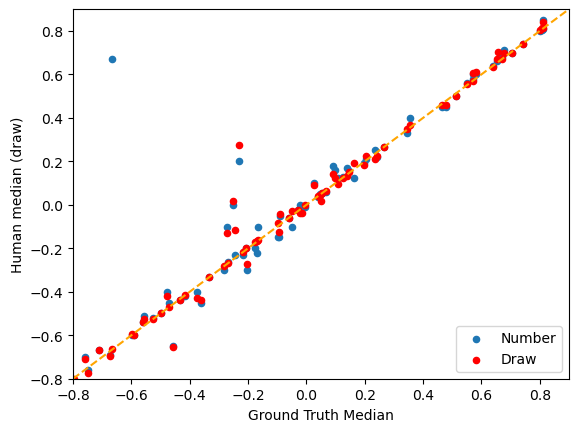

In [70]:
ax = df_a1.plot(x='Ground Truth Median', y='Human median (number)', kind='scatter', label='Number')
df_a1.plot(x='Ground Truth Median', y='Human median (draw)', kind='scatter', label='Draw', ax=ax, color='red')

# so we can compare
mxmin = -0.8
mxmax = 0.9

# draw line of what it should be
ax.plot([mxmin,mxmax],[mxmin,mxmax], color='orange', linestyle='--')

ax.set_ylim(mxmin,mxmax)
ax.set_xlim(mxmin,mxmax)

In [71]:
diff1 = (np.abs(df_a1['Ground Truth Median']-df_a1['Human median (draw)']))/np.abs(df_a1['Ground Truth Median'])

np.mean(diff1), np.std(diff1)

(0.19298121815362174, 0.42507057171782764)

In [72]:
q1 = np.percentile(diff1, 25)
q3 = np.percentile(diff1, 75)

iqr = q3 - q1

np.median(diff1), iqr

(0.0364671267337863, 0.11682488786479395)

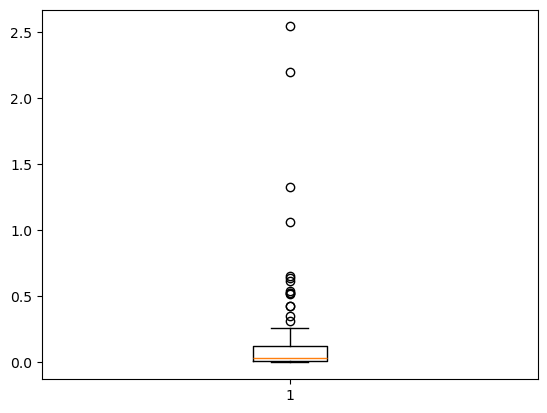

In [73]:
plt.boxplot(diff1)
plt.show()

### Annotator 2

In [74]:
df_a2 = df[df['annotators']=='annotator2']

len(df_a2)

80

<Axes: xlabel='Ground Truth nGaussians', ylabel='Human nGaussians'>

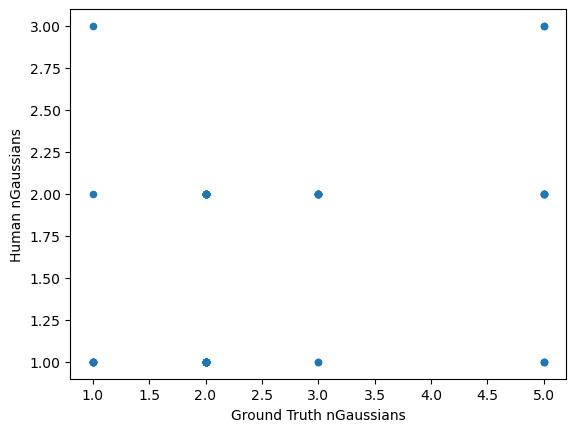

In [75]:
df_a2.plot(x='Ground Truth nGaussians', y='Human nGaussians', kind='scatter')

(-0.8, 0.9)

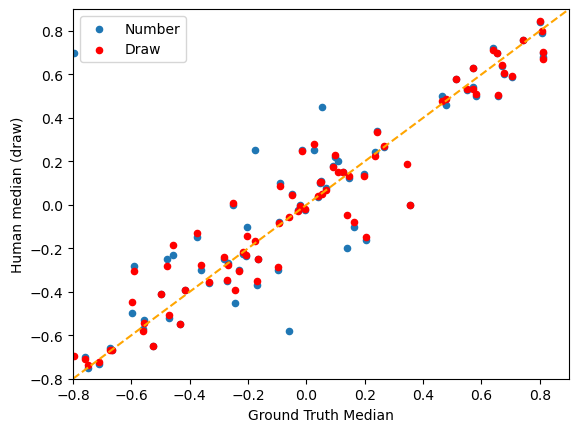

In [76]:
ax = df_a2.plot(x='Ground Truth Median', y='Human median (number)', kind='scatter', label='Number')
df_a2.plot(x='Ground Truth Median', y='Human median (draw)', kind='scatter', label='Draw', ax=ax, color='red')

# so we can compare
mxmin = -0.8
mxmax = 0.9

ax.plot([mxmin,mxmax],[mxmin,mxmax], color='orange', linestyle='--')

ax.set_ylim(mxmin,mxmax)
ax.set_xlim(mxmin,mxmax)

In [77]:
diff2 = (np.abs(df_a2['Ground Truth Median']-df_a2['Human median (draw)']))/np.abs(df_a2['Ground Truth Median'])

np.mean(diff2), np.std(diff2)

(0.7191192015889002, 2.132788369224864)

In [78]:
q1 = np.percentile(diff2, 25)
q3 = np.percentile(diff2, 75)

iqr2 = q3 - q1

np.median(diff2), iqr2

(0.14713641903869362, 0.4655998981178578)

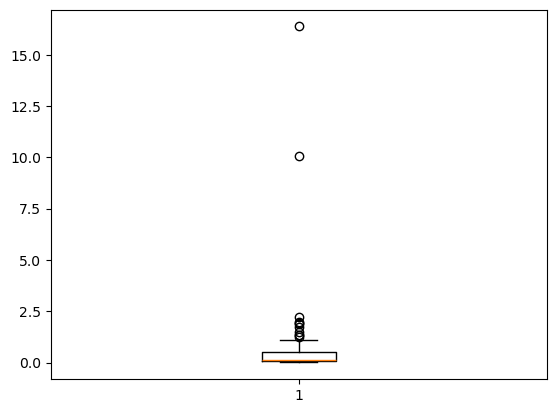

In [79]:
plt.boxplot(diff2)
plt.show()

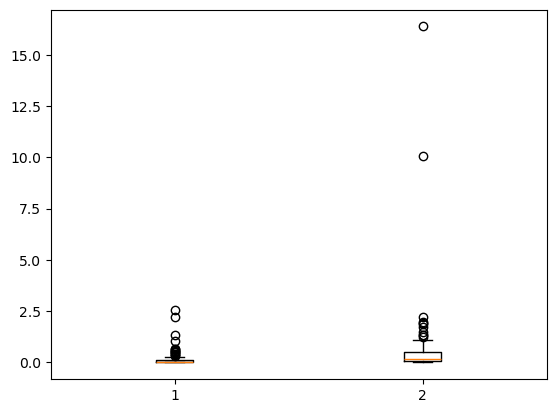

In [80]:
plt.boxplot([diff1,diff2])
plt.show()

## Compare to chatgpt (or other LLM)

In [148]:
df.head()

,annotators,image file,Human nGaussians,Human median (number),Human median (draw),Ground Truth nGaussians,Ground Truth Median
0,annotator1,id_0041.jpeg,1,0.055,0.055269,1,0.054428
1,annotator1,id_0014.jpeg,3,0.450,0.457472,1,0.478811
2,annotator1,id_0028.jpeg,2,-0.420,-0.415863,2,-0.417302
3,annotator1,id_0057.jpeg,2,-0.700,-0.707283,2,-0.758364
4,annotator1,id_0020.jpeg,1,-0.200,-0.171428,1,-0.178007


In [149]:
pickles = glob(dir_api + '*.pickle')
pickles[:3], len(pickles)

(['./example_hists/LLM_outputs/chatgpt_api/id_0039.pickle',
  './example_hists/LLM_outputs/chatgpt_api/id_0044.pickle',
  './example_hists/LLM_outputs/chatgpt_api/id_0027.pickle'],
 80)

In [ ]:
# names subset
pnames = []
for p in pickles:
    pn = p.split('/')[-1].removesuffix('.pickle') + '.jpeg'
    pnames.append(pn)

df2 = df.copy()[df['image file'].isin(np.array(pnames))]

#import sys; sys.exit()

llm_median = []
llm_ngaussian = []
llm_ngaussian_int = []

subset_questions_by_keys = [
    {
        'df flag':'LLM nGaussians',
        'question':'How many gaussians were used to generate the data for the plot in the figure panel?',
        'list':llm_ngaussian
    },
    {
        'question':'What are the median data values  in this figure panel? ',
        'df flag':'LLM Median',
        'list':llm_median
    },
    {
        'df flag':'LLM nGaussians (int)',
        'question':'How many gaussians were used to generate the data for the plot in the figure panel? Please choose an integer number from 1 to 5.',
        'list':llm_ngaussian_int
    }
    ]
#import sys; sys.exit()
#['median', 'ngaussian'] # JPN: this is not efficient
# fill with LLM outputs
for i in range(len(df2)):
    pfile = dir_api + df2.iloc[i]['image file'].removesuffix('.jpeg') + '.pickle'
    with open(pfile, 'rb') as f:
        qa_in = pickle.load(f)[0]

    #import sys; sys.exit()

    for qa_pairs in qa_in: # find right questions
        for subset in subset_questions_by_keys:
            if qa_pairs['question'] == subset['question']:
                ans = qa_pairs['Response']
                try:
                    v = list(ans.values())[0]
                    subset['list'].append(v)
                except:
                    subset['list'].append(np.nan)

for subset in subset_questions_by_keys:
    df2[subset['df flag']] = subset['list']

In [151]:
#qa_in

In [142]:
# just do the part that is a single annotator
df2_a1 = df2[df2['annotators']=='annotator1']
len(df2_a1)

24

In [143]:
df2_a1.head(n=3)

,annotators,image file,Human nGaussians,Human median (number),Human median (draw),Ground Truth nGaussians,Ground Truth Median,LLM nGaussians,LLM Median,LLM nGaussians (int)
0,annotator1,id_0041.jpeg,1,0.055,0.055269,1,0.054428,1,0.055,1
3,annotator1,id_0057.jpeg,2,-0.700,-0.707283,2,-0.758364,2,-0.750,2
4,annotator1,id_0020.jpeg,1,-0.200,-0.171428,1,-0.178007,1,0.000,1


(-0.8, 0.9)

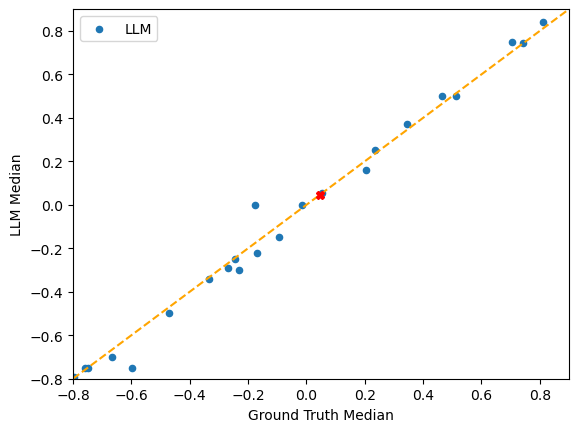

In [144]:
ax = df2_a1.plot(x='Ground Truth Median', y='LLM Median', kind='scatter', label='LLM')

# so we can compare
mxmin = -0.8
mxmax = 0.9

ax.plot([mxmin,mxmax],[mxmin,mxmax], color='orange', linestyle='--')
# plot NaNs
for i in range(len(df2_a1)):
    llmm = df2_a1.iloc[i]['LLM Median']
    try:
        llmm = float(llmm)
    except:
        print("FAILED:", llmm)
        llmm = np.nan
    try:
        if np.isnan(llmm):
            gtm = df2_a1.iloc[i]['Ground Truth Median']
            ax.plot([gtm],[gtm], color='red', marker='X')
            #print(gtm)
    except:
        pass
        #print('THIS FAILED:', llmm)

ax.set_ylim(mxmin,mxmax)
ax.set_xlim(mxmin,mxmax)

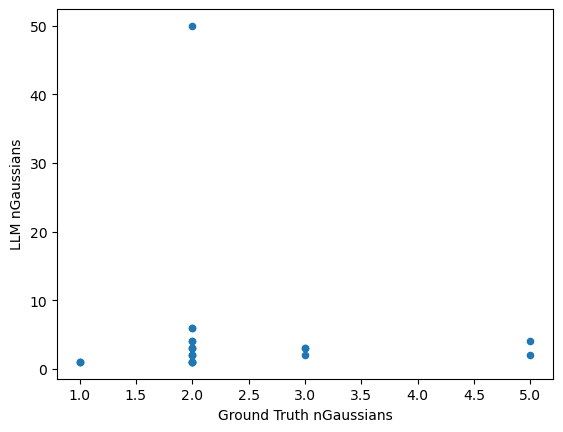

In [145]:
ax = df2_a1.plot(x='Ground Truth nGaussians', y='LLM nGaussians', kind='scatter')
# plot NaNs
for i in range(len(df2_a1)):
    llmm = df2_a1.iloc[i]['LLM nGaussians']
    if np.isnan(llmm):
        gtm = df2_a1.iloc[i]['Ground Truth nGaussians']
        ax.plot([gtm],[gtm], color='red', marker='X')
        print(gtm)

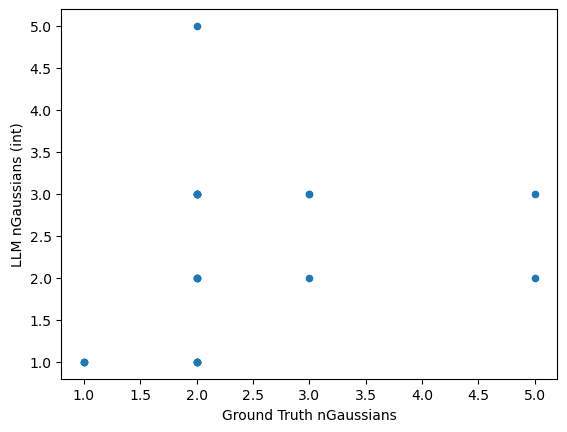

In [147]:
ax = df2_a1.plot(x='Ground Truth nGaussians', y='LLM nGaussians (int)', kind='scatter')
# plot NaNs
for i in range(len(df2_a1)):
    llmm = df2_a1.iloc[i]['LLM nGaussians']
    if np.isnan(llmm):
        gtm = df2_a1.iloc[i]['Ground Truth nGaussians']
        ax.plot([gtm],[gtm], color='red', marker='X')
        print(gtm)